$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 3: Mini-Project
<a id=part3></a>

In this part you'll implement a small comparative-analysis project, heavily based on the materials from the tutorials and homework.

You must **choose one** of the project options specified below.

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Sentiment Analysis with Self-Attention and Word Embeddings

Based on Tutorials 6 and 7, we'll implement and train an improved sentiment analysis model.
We'll use self-attention instead of RNNs and incorporate pre-trained word embeddings.

In tutorial 6 we saw that we can train word embeddings together with the model.
Although this produces embeddings which are customized to the specific task at hand,
it also greatly increases training time.
A common technique is to use pre-trained word embeddings.
This is essentially a large mapping from words (e.g. in english) to some
high-dimensional vector, such that semantically similar words have an embedding that is
"close" by some metric (e.g. cosine distance).
Use the [GloVe](https://nlp.stanford.edu/projects/glove/) 6B embeddings for this purpose.
You can load these vectors into the weights of an `nn.Embedding` layer.

In tutorial 7 we learned how attention can be used to learn to predict a relative importance
for each element in a sequence, compared to the other elements.
Here, we'll replace the RNN with self-attention only approach similar to Transformer models, roughly based on [this paper](https://www.aclweb.org/anthology/W18-6219.pdf).
After embedding each word in the sentence using the pre-trained word-embedding a positional-encoding vector is added to provide each word in the sentence a unique value based on it's location.
One or more self-attention layers are then applied to the results, to obtain an importance weighting for each word.
Then we classify the sentence based on the average these weighted encodings.


Now, using these approaches, you need to:

- Implement a **baseline** model: Use pre-trained embeddings with an RNN-based model.
You can use LSTM/GRU or bi-directional versions of these, in a way very similar to what we implemented in the tutorial.
-  Implement an **improved** model: Based on the self-attention approach, implement an attention-based sentiment analysis model that has 1-2 self-attention layers instead of an RNN. You should use the same pre-trained word embeddings for this model.
- You can use pytorch's built-in RNNs, attention layers, etc.
- For positional encoding you can use the sinosoidal approach described in the paper (first proposed [here](https://arxiv.org/pdf/1706.03762.pdf)). You can use existing online implementations (even though it's straightforward to implement). 
- You can use the SST database as shown in the tutorial.

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis: compare the baseline to the improved model. Compare in terms of overall classification accuracy and show a multiclass confusion matrix.
- Visualize of the attention maps for a few movie reviews from each class, and explain the results.

## Spectrally-Normalized Wasserstein GANs

In HW3 we implemented a simple GANs from scratch, using an approach very similar to the original GAN paper. However, the results left much to be desired and we discovered first-hand how hard it is to train GANs due to their inherent instability.

One of the prevailing approaches for improving training stability for GANs is to use a technique called [Spectral Normalization](https://arxiv.org/pdf/1802.05957.pdf) to normalize the largest singular value of a weight matrix so that it equals 1.
This approach is generally applied to the discriminator's weights in order to stabilize training. The resulting model is sometimes referred to as a SN-GAN.
See Appendix A in the linked paper for the exact algorithm. You can also use pytorch's `spectral_norm`.

Another very common improvement to the vanilla GAN is known a [Wasserstein GAN](https://arxiv.org/pdf/1701.07875.pdf) (WGAN). It uses a simple modification to the loss function, with strong theoretical justifications based on the Wasserstein (earth-mover's) distance.
See also [here](https://developers.google.com/machine-learning/gan/loss) for a brief explanation of this loss function.

One problem with generative models for images is that it's difficult to objectively assess the quality of the resulting images.
To also obtain a quantitative score for the images generated by each model,
we'll use the [Inception Score](https://arxiv.org/pdf/1606.03498.pdf).
This uses a pre-trained Inception CNN model on the generated images and computes a score based on the predicted probability for each class.
Although not a perfect proxy for subjective quality, it's commonly used a way to compare generative models.
You can use an implementation of this score that you find online, e.g. [this one](https://github.com/sbarratt/inception-score-pytorch) or implement it yourself.

Based on the linked papers, add Spectral Normalization and the Wassertein loss to your GAN from HW3.
Compare between:
- The baseline model (vanilla GAN)
- SN-GAN (vanilla + Spectral Normalization)
- WGAN (using Wasserstein Loss)
- Optional: SN+WGAN, i.e. a combined model using both modifications.

As a dataset, you can use [LFW](http://vis-www.cs.umass.edu/lfw/) as in HW3 or [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), or even choose a custom dataset (note that there's a dataloder for CelebA in `torchvision`). 

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis between the baseline and the other models. Compare:
  - Subjective quality (show multiple generated images from each model)
  - Inception score (can use a subset of the data).
- You should show substantially improved subjective visual results with these techniques.

## Implementation

**TODO**: This is where you should write your explanations and implement the code to display the results.
See guidelines about what to include in this section.


<hr style="border: 4px dashed green;" />


# **Answers -** <br> Spectrally-Normalized Wasserstein Generative Adversarial Nets (GANs)
<hr style="border:2px solid gray"> </hr>


As can be understood from the title, we choose to implement the GAN option.
We will use the same network we have built in homework #3, and the same dataset. Based on this DCGAN, we will implement the SN-GAN which uses a spectral normalization and WGAN which uses Wasserstein loss and some more changes that will be detailed later.
We will try to keep it as simple as possible, and don't change too much between each section to detect the additive ideas effect.

Note that this notebook isn't run any training, as asked. This notebook is the same as used in last homework, and in order to train it again just remove / change name of the `project/<GAN_name>final.pt` files.


Let's start with out imports to do it.


In [1]:
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile
import pickle

import numpy as np
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

test = unittest.TestCase()
plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


### Obtaining the dataset
As mentioned before, we'll use the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) (LFW) dataset as done in HW #3.
Again, we're going to train our generative model to generate a George W. Bush images (as you call it, Bush Generator 😎).


In [2]:
import cs236781.plot as plot
import cs236781.download
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

DATA_DIR = pathlib.Path.home().joinpath('.pytorch-datasets')
DATA_URL = 'http://vis-www.cs.umass.edu/lfw/lfw-bush.zip'

_, dataset_dir = cs236781.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)

im_size = 64
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)

File /home/nitzanmadar/.pytorch-datasets/lfw-bush.zip exists, skipping download.
Extracting /home/nitzanmadar/.pytorch-datasets/lfw-bush.zip...
Extracted 531 to /home/nitzanmadar/.pytorch-datasets/lfw/George_W_Bush


Let's see what we've got.

Found 530 images in dataset folder.
Images shape:torch.Size([1, 3, 64, 64])


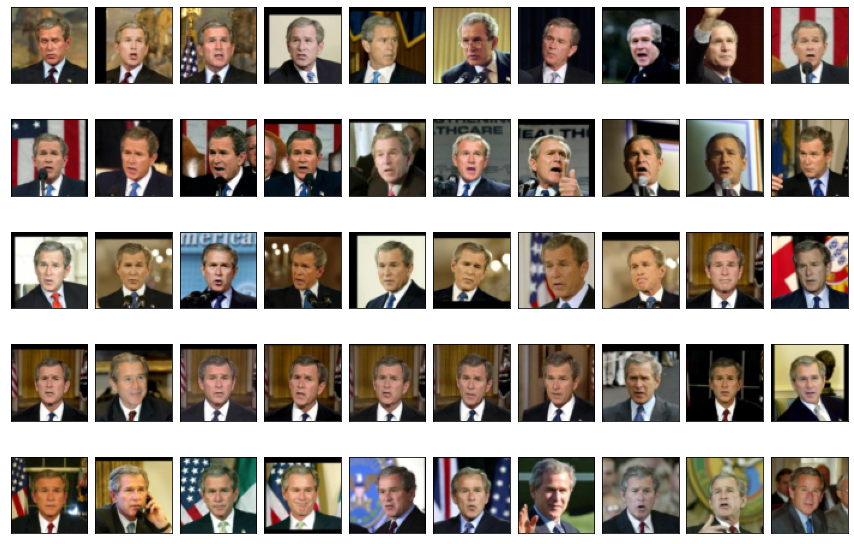

In [3]:
_ = plot.dataset_first_n(ds_gwb, 50, figsize=(15,10), nrows=5)
print(f'Found {len(ds_gwb)} images in dataset folder.')

x0, y0 = ds_gwb[0]
x0 = x0.unsqueeze(0).to(device)
print(f'Images shape:{x0.shape}')

test.assertSequenceEqual(x0.shape, (1, 3, im_size, im_size))

We remind again, in the next section, the notebook will load the results if the relevant files are exist in `project` folder.
To train the networks again - just rename/remove thecorrespond `<GAN_name>_final.pt` file to something else.


## Vanilla GAN (from HW #3)
---


As a Vanilla GAN model, we will use the same architecture from HW#3, which is a simple DCGAN.

First, as a reminder, let see the model architecture. This model will be the base of all next networks.
* Our discriminator:

In [4]:
import project.vanilla_gan as vanilla_gan

dsc = vanilla_gan.Discriminator(in_size=x0[0].shape).to(device)
print(dsc)

d0 = dsc(x0)
print(d0.shape)

test.assertSequenceEqual(d0.shape, (1,1))

Discriminator(
  (Discriminator_net): Sequential(
    (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Conv2d(512, 1024, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (10): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01)
  )
  (linear): Linear(in_features=16384, out_features=1, bias=True)
)
torch.Size([1, 1])


* Our generator:

In [5]:
z_dim = 128
gen = vanilla_gan.Generator(z_dim, 4).to(device)
print(gen)

z = torch.randn(1, z_dim).to(device)
xr = gen(z)
print(xr.shape)

test.assertSequenceEqual(x0.shape, xr.shape)

Generator(
  (unlinear): Linear(in_features=128, out_features=16384, bias=True)
  (Decoder): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): ConvTranspose2d(512, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): ConvTranspose2d(128, 3, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (10): Tanh()
  )
)
torch.Size([1, 3, 64, 64])


The next cell is for training or load the final file. This should be the same training and results from HW#3.

In addition, we have added some simple code to save the losses curves, this we be also used in next sections to see the different train losses curves.

In [6]:
import project.vanilla_gan as gan

import torch.optim as optim
from torch.utils.data import DataLoader
from project.hyperparameters import vanilla_gan_hyperparams
from project.inception_score import inception_score

torch.manual_seed(42)

# Hyperparams
hp = vanilla_gan_hyperparams()
skip = False

batch_size = hp['batch_size']
z_dim = hp['z_dim']

# Data
dl_train = DataLoader(ds_gwb, batch_size, shuffle=True)
im_size = ds_gwb[0][0].shape

# Model
dsc = gan.Discriminator(im_size).to(device)
gen = gan.Generator(z_dim, featuremap_size=4).to(device)

# Optimizer
def create_optimizer(model_params, opt_params):
    opt_params = opt_params.copy()
    optimizer_type = opt_params['type']
    opt_params.pop('type')
    return optim.__dict__[optimizer_type](model_params, **opt_params)
dsc_optimizer = create_optimizer(dsc.parameters(), hp['discriminator_optimizer'])
gen_optimizer = create_optimizer(gen.parameters(), hp['generator_optimizer'])

# Loss
def dsc_loss_fn(y_data, y_generated):
    return gan.discriminator_loss_fn(y_data, y_generated, hp['data_label'], hp['label_noise'])

def gen_loss_fn(y_generated):
    return gan.generator_loss_fn(y_generated, hp['data_label'])

# Training
checkpoint_file = 'project/vanilla_gan'
checkpoint_file_final = f'{checkpoint_file}_final'
if os.path.isfile(f'{checkpoint_file}.pt'):
    os.remove(f'{checkpoint_file}.pt')

# Show hypers
print(hp)

import IPython.display
import tqdm
from project.vanilla_gan import train_batch, save_checkpoint

num_epochs = 100

if os.path.isfile(f'{checkpoint_file_final}.pt'):
    print(f'*** Loading final checkpoint file {checkpoint_file_final} instead of training')
    num_epochs = 0
    gen = torch.load(f'{checkpoint_file_final}.pt', map_location=device)
    checkpoint_file = checkpoint_file_final
    skip=True

try:
    dsc_avg_losses, gen_avg_losses = [], []
    vanilla_inception_mean, vanilla_inception_std = [], []
    for epoch_idx in range(num_epochs):
        # We'll accumulate batch losses and show an average once per epoch.
        dsc_losses, gen_losses = [], []
        
        print(f'--- EPOCH {epoch_idx+1}/{num_epochs} ---')

        with tqdm.tqdm(total=len(dl_train.batch_sampler), file=sys.stdout) as pbar:
            for batch_idx, (x_data, _) in enumerate(dl_train):
                x_data = x_data.to(device)
                dsc_loss, gen_loss = train_batch(
                    dsc, gen,
                    dsc_loss_fn, gen_loss_fn,
                    dsc_optimizer, gen_optimizer,
                    x_data)
                dsc_losses.append(dsc_loss)
                gen_losses.append(gen_loss)
                pbar.update()

        dsc_avg_losses.append(np.mean(dsc_losses))
        gen_avg_losses.append(np.mean(gen_losses))
        print(f'Discriminator loss: {dsc_avg_losses[-1]}')
        print(f'Generator loss:     {gen_avg_losses[-1]}')

        if save_checkpoint(gen, dsc_avg_losses, gen_avg_losses, checkpoint_file):
            print(f'Saved checkpoint.')


        samples = gen.sample(5, with_grad=False)
        mean, std= inception_score(gen.sample(n=80, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)

        print(f'inception score: {mean}')
        vanilla_inception_mean.append(mean)
        vanilla_inception_std.append(std)
        fig, _ = plot.tensors_as_images(samples.cpu(), figsize=(6,2))
        IPython.display.display(fig)
        plt.close(fig)
    
    if not skip:
        # Save losses:
        import pickle
        # Save discriminator and generator losses
        with open('project/vanilla_avg_dsc_losses.pkl', 'wb') as f:
            pickle.dump(dsc_avg_losses, f)
            print('Save fild: project/vanilla_avg_dsc_losses.pkl')

        with open('project/vanilla_avg_gen_losses.pkl', 'wb') as f:
            pickle.dump(gen_avg_losses, f)
            print('Save fild: project/vanilla_avg_gen_losses.pkl')

        with open('project/vanilla_mean_inception.pkl', 'wb') as f:
            pickle.dump(vanilla_inception_mean, f)
            print('Save fild: project/vanilla_mean_inception.pkl')

        with open('project/vanilla_std_inception.pkl', 'wb') as f:
            pickle.dump(vanilla_inception_std, f)
            print('Save fild: project/vanilla_std_inception.pkl')

except KeyboardInterrupt as e:
    print('\n *** Training interrupted by user')

{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.25, 'discriminator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}, 'generator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}}
*** Loading final checkpoint file project/vanilla_gan_final instead of training


The training process described in HW#3, and we will just load the model and the losses we've got during the training process.

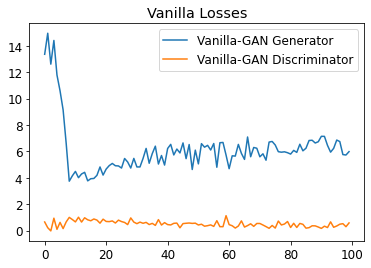

In [7]:
# read discriminator and generator losses
with open('project/vanilla_avg_dsc_losses.pkl', 'rb') as f:
    vanilla_dsc_avg_losses = pickle.load(f)
    
with open('project/vanilla_avg_gen_losses.pkl', 'rb') as f:
    vanilla_gen_avg_losses = pickle.load(f)


plt.plot(vanilla_gen_avg_losses, label='Vanilla-GAN Generator')
plt.plot(vanilla_dsc_avg_losses, label='Vanilla-GAN Discriminator')
plt.legend()
plt.title('Vanilla Losses')
plt.show()

Here, we can see that the generator loss starts with sharp improvement at the beginning, and at the end, the loss is a bit noisy. The discriminator loss looks like a constant loss value which can be interpreted as stable discriminator w.r.t. generator capabilities.
In other words, we can see that the results are not bad, and the generator loss show improvement but also noisy which can be improved.

Now, we will load the model (~74MB, will not be added to submission file, the same as submitted in HW#3) and display generated images:

*** Loading final checkpoint file project/vanilla_gan_final.pt ***
Hyperparameters: {'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.25, 'discriminator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}, 'generator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}}
*** Images Generated from best model:


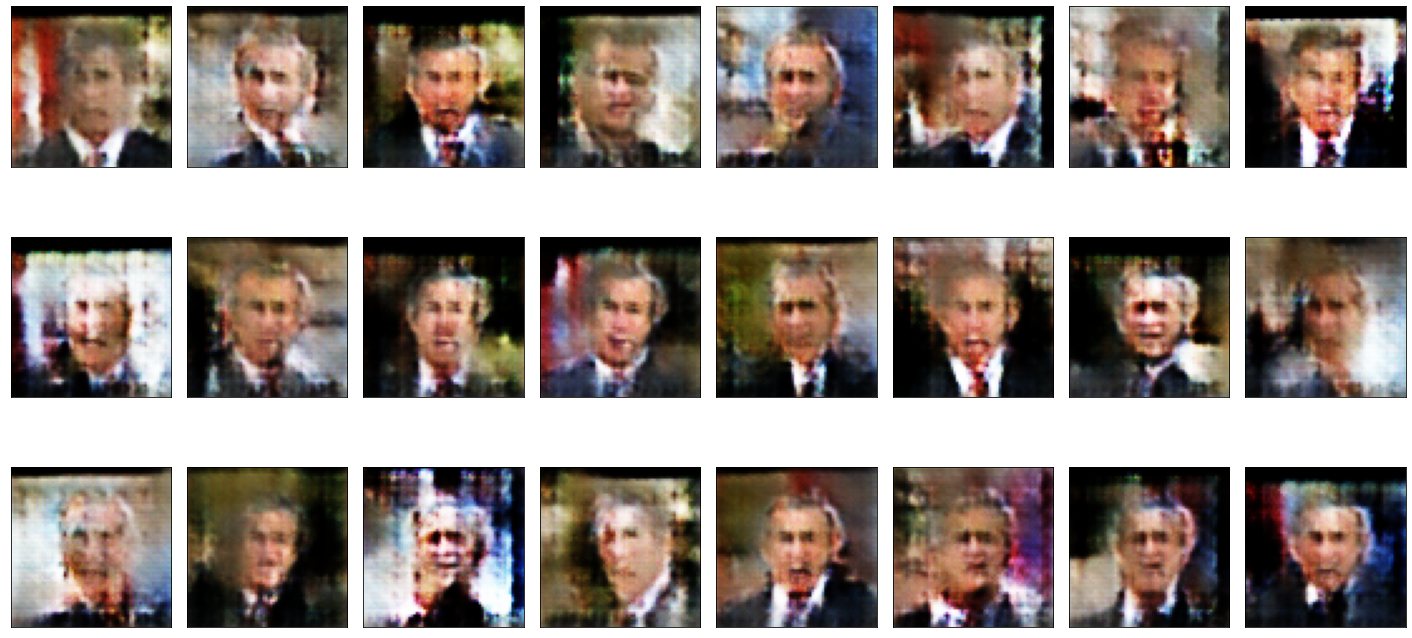

In [8]:
import IPython.display
import tqdm
from project.vanilla_gan import train_batch, save_checkpoint
from project.hyperparameters import vanilla_gan_hyperparams

def renamed_load(file_obj):
    return RenameUnpickler(file_obj).load()

hp = vanilla_gan_hyperparams()

vanilla_checkpoint_file_final = f'project/vanilla_gan_final.pt'
print(f'*** Loading final checkpoint file {vanilla_checkpoint_file_final} ***')
print(f'Hyperparameters: {hp}')
vanilla_gen = torch.load(vanilla_checkpoint_file_final, map_location=device)
print('*** Images Generated from best model:')
vanilla_samples = vanilla_gen.sample(n=24, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(vanilla_samples, nrows=3, figsize=(25,12))


## SN-GAN (Vanilla + Spectral Normalization)
---


#### **What is Spectral Normalization?**

[Spectral Normalization](https://arxiv.org/pdf/1802.05957.pdf) is a method for weight normalization that aim to deal with the discriminator instability of GAN training process.
What it acctually done is rescalling the weight tensor with specral norm of that matrix.
Spectral normalization is simply normalization method which normalize each value of a weight matrix by it largest singular value. It can be formalized mathematically:
$$W_{SN} = \frac{W}{\sigma(W)}$$
where, $\sigma(W)$ is the maximal singular value:
$$\sigma(W) = \max_{h:h\neq0}\frac{\norm{Wh}_2}{\norm{h}_2}$$


#### **The Challenge - Finding $\sigma(W)$:**

One of the challenges of this method is find this $\sigma(W)$. This issue is solved by calculating it using *power iteration* technique, which is cheap and effective. Let's try to dive a little into it and provide short mathmatical explaination of this method:


Let's think of linear transform $W : \mathbb{R}^n \rightarrow \mathbb{R}^m$, 
and suppose we have a vector $v\in \mathbb{R}^n$, and a vector $u\in\mathbb{R}^m$.

We also can formulate a square matrix $W^T W : \mathbb{R}^n \rightarrow \mathbb{R}^n$. 
A Power iteration - 
$$v_{t+1} = \frac{W^T W v_t}{\norm{W^T W v_t}}$$
we can use is to write:
$$v_{t} = \frac{(W^T W)^t v}{\norm{(W^T W)^t v}}$$
According to the [spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem), we can write $v$ in an orthonormal basis of eigenvectors of $W^T W$. 
Denote  $\left(\lambda_1, \ldots, \lambda_n\right)$ to be the descending eigenvalues of $W^TW$ and $\left(e_1, \ldots, e_n\right)$ will be the corresponding eigenvectors.

The Power iteration can be computed as follow:
$$v_{t} = \frac{(W^T W)^t \sum_i v_i e_i}{\norm{(W^T W)^t \sum_i v_i e_i}}
= \frac{\sum_i v_i \lambda_i^t e_i}{\norm{\sum_i v_i \lambda_i^t e_i}}
= \frac{v_1 \lambda_1^t \sum_i \frac{v_i}{v_1} \left(\frac{\lambda_i}{\lambda_1}\right)^t e_i}{\norm{v_1 \lambda_1^t \sum_i \frac{v_i}{v_1} \left(\frac{\lambda_i}{\lambda_1}\right)^t e_i}}$$

As mentioned before, $\lambda_1$ is the largest eigenvalue of $W^TW$, upon power iteration for $i>1$: $\lim\limits_{t\rightarrow\infty}\frac{\lambda_i}{\lambda_1} = 0 $ . 
Therefore, $v_t$ converges to $e_1$. 
Additionally, $\frac{W v_t}{\norm{W v_t}} = u_t$.
After that, the power iteration can be written as:
$$
u_{t+1} = W v_t\\
v_{t+1} = W^T u_{t+1}
$$

The singular values of $W_T$ and $W$ are the same, thus it must be that the spectral norm is $\sigma(W) = \sqrt{\lambda_1} = \norm{W v}$ . 
Since $\norm{u}$ is of unit length, the spectral norm can be computed as follows:
$$\sigma(W) = \norm{W v} = u^T W v$$

Now, the algorithm of spectral normalization should appear simple. 
For every weight in our network, we randomly initialize vectors $u$ and $v$. 
Because the weights change slowly, we only need to perform a single power iteration on the current version of these vectors for each step of learning.


#### **Implementation:**

We used the pytorch [`nn.utils.Spectral_Norm()`](https://pytorch.org/docs/stable/generated/torch.nn.utils.spectral_norm.html) layer which does exactly what was described before.
In order to make a correct comparison, and see the affect of normalization changing, we will use the same network as we provide in the Vanilla GAN section except for changing the `nn.conv2d->nn.BatchNorm` layer with `nn.utils.Spectral_Norm(nn.conv2d)`.

Let's print the architecture:

In [9]:
import project.SN_gan as SN_gan

dsc_SN = SN_gan.Discriminator(in_size=x0[0].shape).to(device)
print(dsc_SN)
d0 = dsc_SN(x0)
print(d0.shape)
test.assertSequenceEqual(d0.shape, (1,1))

z_dim = 128
gen_SN = SN_gan.Generator(z_dim, 4).to(device)
print(gen_SN)
z = torch.randn(1, z_dim).to(device)
xr = gen_SN(z)
print(xr.shape)
test.assertSequenceEqual(x0.shape, xr.shape)

Discriminator(
  (Discriminator_net): Sequential(
    (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(512, 1024, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): LeakyReLU(negative_slope=0.01)
  )
  (linear): Linear(in_features=16384, out_features=1, bias=True)
)
torch.Size([1, 1])
Generator(
  (unlinear): Linear(in_features=128, out_features=16384, bias=True)
  (Decoder): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): ConvTranspose2d(512, 256, kernel_size=(

As we have seen in various implementations of SN-GAN, the specral normalization is added to the discriminator network.
According to that, we removed the batch normaliztion layers in the discrimintor and change in to use the spectral normalization. Note that it isn't printed above!

### Training / Loading Results:

In [10]:
import torch.optim as optim
from torch.utils.data import DataLoader
from project.hyperparameters import sn_gan_hyperparams

torch.manual_seed(42)

# Hyperparams
hp = sn_gan_hyperparams()
batch_size = hp['batch_size']
z_dim = hp['z_dim']

# Data
dl_train = DataLoader(ds_gwb, batch_size, shuffle=True)
im_size = ds_gwb[0][0].shape

# Model
dsc_sn = SN_gan.Discriminator(im_size).to(device)
gen_sn = SN_gan.Generator(z_dim, featuremap_size=4).to(device)

# Optimizer
def create_optimizer(model_params, opt_params):
    opt_params = opt_params.copy()
    optimizer_type = opt_params['type']
    opt_params.pop('type')
    return optim.__dict__[optimizer_type](model_params, **opt_params)
dsc_optimizer = create_optimizer(dsc_sn.parameters(), hp['discriminator_optimizer'])
gen_optimizer = create_optimizer(gen_sn.parameters(), hp['generator_optimizer'])

# Loss
def dsc_loss_fn(y_data, y_generated):
    return SN_gan.discriminator_loss_fn(y_data, y_generated, hp['data_label'], hp['label_noise'])

def gen_loss_fn(y_generated):
    return SN_gan.generator_loss_fn(y_generated, hp['data_label'])

# Training
checkpoint_file = 'project/sn_gan'
checkpoint_file_final = f'{checkpoint_file}_final'
if os.path.isfile(f'{checkpoint_file}.pt'):
    os.remove(f'{checkpoint_file}.pt')

# Show hypers
print(hp)

{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.25, 'discriminator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}, 'generator_optimizer': {'type': 'Adam', 'weight_decay': 0.02, 'betas': (0.5, 0.99), 'lr': 0.0002}}


In [11]:
import IPython.display
import tqdm
from project.SN_gan import train_batch, save_checkpoint

num_epochs = 100
skip=False

if os.path.isfile(f'{checkpoint_file_final}.pt'):
    print(f'*** Loading final checkpoint file {checkpoint_file_final} instead of training')
    num_epochs = 0
    gen = torch.load(f'{checkpoint_file_final}.pt', map_location=device)
    checkpoint_file = checkpoint_file_final
    skip=True

try:
    dsc_avg_losses, gen_avg_losses = [], []
    sn_inception_mean, sn_inception_std = [], []
    for epoch_idx in range(num_epochs):
        # We'll accumulate batch losses and show an average once per epoch.
        dsc_losses, gen_losses = [], []
        print(f'--- EPOCH {epoch_idx+1}/{num_epochs} ---')

        with tqdm.tqdm(total=len(dl_train.batch_sampler), file=sys.stdout) as pbar:
            for batch_idx, (x_data, _) in enumerate(dl_train):
                x_data = x_data.to(device)
                dsc_loss, gen_loss = train_batch(
                    dsc_sn, gen_sn,
                    dsc_loss_fn, gen_loss_fn,
                    dsc_optimizer, gen_optimizer,
                    x_data)
                dsc_losses.append(dsc_loss)
                gen_losses.append(gen_loss)
                pbar.update()

        dsc_avg_losses.append(np.mean(dsc_losses))
        gen_avg_losses.append(np.mean(gen_losses))
        print(f'Discriminator loss: {dsc_avg_losses[-1]}')
        print(f'Generator loss:     {gen_avg_losses[-1]}')
        
        if save_checkpoint(gen_sn, dsc_avg_losses, gen_avg_losses, checkpoint_file):
            print(f'Saved checkpoint.')
            

        samples = gen_sn.sample(5, with_grad=False)
        
        mean, std= inception_score(gen.sample(n=80, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)

        print(f'inception score: {mean}')
        sn_inception_mean.append(mean)
        sn_inception_std.append(std)
        
        fig, _ = plot.tensors_as_images(samples.cpu(), figsize=(6,2))
        IPython.display.display(fig)
        plt.close(fig)
        

            
except KeyboardInterrupt as e:
    print('\n *** Training interrupted by user')



*** Loading final checkpoint file project/sn_gan_final instead of training


In [12]:
if not skip:
    # Save discriminator and generator losses
    with open('project/sn_avg_dsc_losses.pkl', 'wb') as f:
        pickle.dump(dsc_avg_losses, f)
        print('Save fild: project/sn_avg_dsc_losses.pkl')

    with open('project/sn_avg_gen_losses.pkl', 'wb') as f:
        pickle.dump(gen_avg_losses, f)
        print('Save fild: project/sn_avg_gen_losses.pkl')
        
    with open('project/sn_inception_mean.pkl', 'wb') as f:
        pickle.dump(sn_inception_mean, f)
        print('Save fild: project/sn_inception_mean.pkl')

    with open('project/sn_inception_std.pkl', 'wb') as f:
        pickle.dump(sn_inception_std, f)
        print('Save fild: project/sn_inception_std.pkl')

Text(0, 0.5, 'loss')

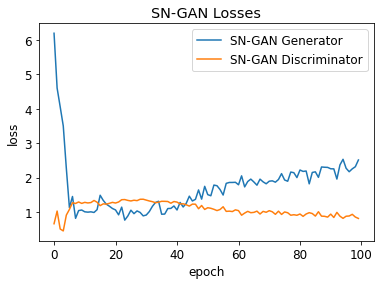

In [13]:
# read discriminator and generator losses
with open('project/sn_avg_dsc_losses.pkl', 'rb') as f:
    sn_dsc_avg_losses = pickle.load(f)
    
with open('project/sn_avg_gen_losses.pkl', 'rb') as f:
    sn_gen_avg_losses = pickle.load(f)


plt.plot(sn_gen_avg_losses, label='SN-GAN Generator')
plt.plot(sn_dsc_avg_losses, label='SN-GAN Discriminator')
plt.legend()
plt.title('SN-GAN Losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

The figure above is different from the vanilla GAN at the point that the SN-GAN generator improves quickly to get lower loss (around epoch 5) than the discriminator (in the vanilla GAN the generator is above all the time). 
We can see that later the discriminator loss starts to get better loss and then we get another intersection between the curves (around epoch 40) - it doesn't mean that the generator became worst, it means that they both improve but the discriminator is doing a better job (we also can see similar behavior in the vanilla GAN, although it is noisier). According to that, we choose the last epoch model and show their results here.
Additionally, compare to the vanilla GAN generator loss (it comparable because is similar net and losses terms), we got here lower loss values - which is a good indicator to have a better result as we will show in the next cell.

project/sn_gan_final
*** Images Generated from best model:


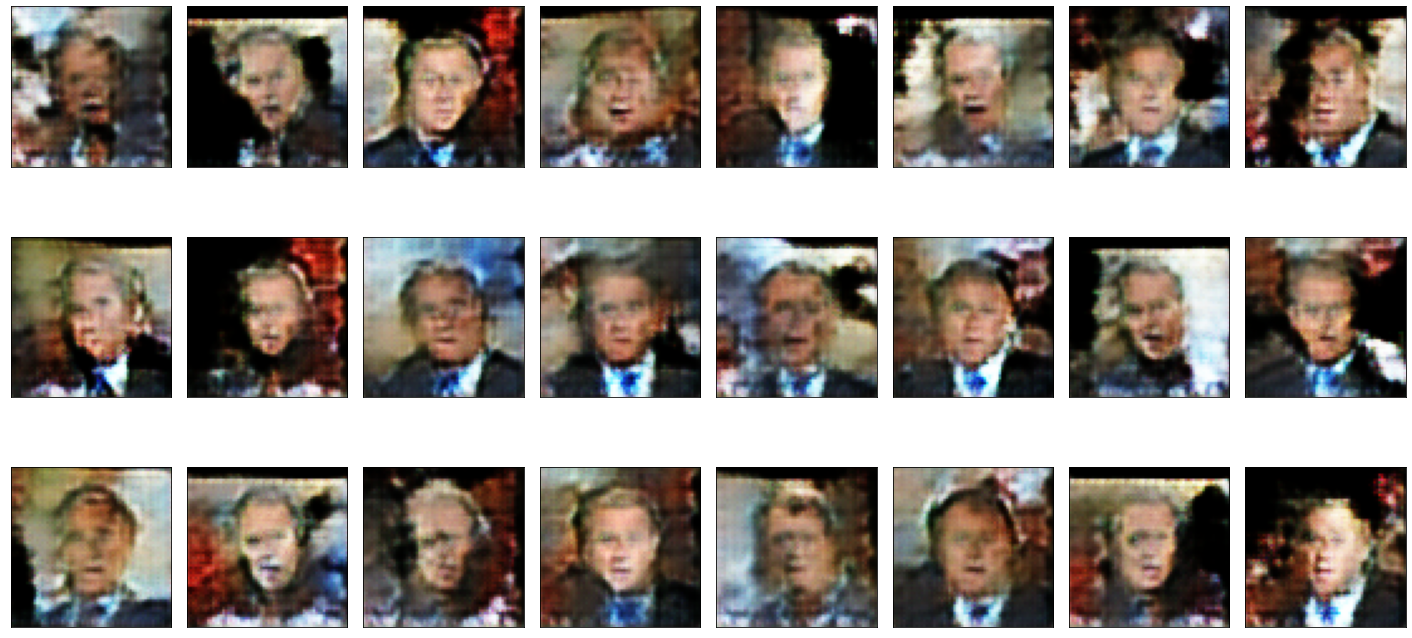

In [14]:
# Plot images from best or last model
    
if os.path.isfile(f'{checkpoint_file}.pt'):
    sn_gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
    print(checkpoint_file)
print('*** Images Generated from best model:')
samples = sn_gen.sample(n=24, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(25,12))


As we can see, by this simple modification we inproved our generator performance. The images generated from the SN-GAN are more clean and smooth, and with better face details.
As a reminder, we want to notice that we didn't change anything except the batch normalization to spectral normalization.

## WGAN (using Wasserstein Loss)
---

In this section, we will use the vanilla GAN provided in the first section and try to improve it using the principles shown in the  [Wasserstein GAN paper](https://arxiv.org/pdf/1701.07875.pdf).

From this paper we learn and implement the following points:
* **Wasserstein Loss**: 
    We change the loss function as described in the paper. There is no cross-entropy or any $log$ in the Wasserstein losses, instead of it we use the next terms:
    * Discriminator loss (critic loss): basically the formula in WGAN is $D(x) - D(G(z))$, or in our terms $\mathbb{E}_{x \sim p(x)}\big[ \Delta_\delta(x) \big] - \mathbb{E}_{z \sim p(z)}\big[ \Delta_\delta(g_\theta(z)) \big]$. 
    * Generator loss: here we simply use $D(G(z))$, or $ \mathbb{E}_{z \sim p(z)}\big[ \Delta_\delta(g_\theta(z)) \big]$ in other words.
    
    Note that our optimizer aims to **minimize** the loss function. Therefore, in the code, we return the negative value of the losses above. 
    Additionally, the code uses class-score vectors, and thus we return `torch.mean()` of the negative value as mention above.
   
    The output of the discriminator is no longer a probability, and according to that, we didn't add sigmoid at the output of it.
    
* **Clip discriminator weights:** The paper suggests to clip the weight of the discriminator, hench, in the `train_batch` function, at the discriminator part we use `param.data.clamp_(-c, c)` for each parameter in the discriminator. As used in the paper algorithm, we also use the same clipping parameter value $c=0.01$.

* **Train the discriminator more than the generator**: To do that, we simply added an internal loop in the `train_batch` function that doing 2 cycles of discriminator training for each loop (thus train the discriminator twice than the generator).

* **Optimizer:**
    The paper uses the RMSProp optimizer, so we use it also instead of ADAM in the previous networks.

* **Lower learning rate:**
    The paper uses a learning rate of $0.00005$, we used the same value.
    
Another change we have done is using a lower `z_dim`, when we understood that this is the easiest change we can do to got better results (without is we have got worst results than the vanilla GAN, which we are trying to improve).

Using that key insight from the paper, we tweak our vanilla GAN and train to see the improvements:



In [15]:
import project.wgan as wgan

dsc_wgan = wgan.Discriminator(in_size=x0[0].shape).to(device)
# print(dsc_wgan) #same net
d0 = dsc_wgan(x0)
# print(d0.shape)
test.assertSequenceEqual(d0.shape, (1,1))

z_dim = 128
gen_wgan = wgan.Generator(z_dim, 4).to(device)
# print(gen_wgan)  #same net
z = torch.randn(1, z_dim).to(device)
xr = gen_wgan(z)
# print(xr.shape)
test.assertSequenceEqual(x0.shape, xr.shape)

In [16]:
import torch.optim as optim
from torch.utils.data import DataLoader
from project.hyperparameters import wgan_hyperparams

torch.manual_seed(42)

# Hyperparams
hp = wgan_hyperparams()
batch_size = hp['batch_size']
z_dim = hp['z_dim']

# Data
dl_train = DataLoader(ds_gwb, batch_size, shuffle=True)
im_size = ds_gwb[0][0].shape

# Model
dsc_wgan = wgan.Discriminator(im_size).to(device)
gen_wgan = wgan.Generator(z_dim, featuremap_size=4).to(device)

# Optimizer
def create_optimizer(model_params, opt_params):
    opt_params = opt_params.copy()
    optimizer_type = opt_params['type']
    opt_params.pop('type')
    return optim.__dict__[optimizer_type](model_params, **opt_params)
dsc_optimizer = create_optimizer(dsc_wgan.parameters(), hp['discriminator_optimizer'])
gen_optimizer = create_optimizer(gen_wgan.parameters(), hp['generator_optimizer'])

# Loss
def dsc_loss_fn(y_data, y_generated):
    return wgan.discriminator_loss_fn(y_data, y_generated, hp['data_label'], hp['label_noise'])

def gen_loss_fn(y_generated):
    return wgan.generator_loss_fn(y_generated, hp['data_label'])

# Training
checkpoint_file = 'project/wgan'
checkpoint_file_final = f'{checkpoint_file}_final'
if os.path.isfile(f'{checkpoint_file}.pt'):
    os.remove(f'{checkpoint_file}.pt')

# Show hypers
print(hp)

{'batch_size': 32, 'z_dim': 10, 'data_label': 1, 'label_noise': 0.25, 'discriminator_optimizer': {'type': 'RMSprop', 'lr': 5e-05}, 'generator_optimizer': {'type': 'RMSprop', 'lr': 5e-05}}


### Training / Loading Results

In [20]:
import IPython.display
import tqdm
from project.wgan import train_batch, save_checkpoint

num_epochs = 100
skip=False

if os.path.isfile(f'{checkpoint_file_final}.pt'):
    print(f'*** Loading final checkpoint file {checkpoint_file_final} instead of training')
    num_epochs = 0
    sn_gen = torch.load(f'{checkpoint_file_final}.pt', map_location=device)
    checkpoint_file = checkpoint_file_final
    skip=True

try:
    dsc_avg_losses, gen_avg_losses = [], []
    wgan_inception_mean, wgan_inception_std = [], []
    for epoch_idx in range(num_epochs):
        # We'll accumulate batch losses and show an average once per epoch.
        dsc_losses, gen_losses = [], []
        print(f'--- EPOCH {epoch_idx+1}/{num_epochs} ---')

        with tqdm.tqdm(total=len(dl_train.batch_sampler), file=sys.stdout) as pbar:
            for batch_idx, (x_data, _) in enumerate(dl_train):
                x_data = x_data.to(device)
                dsc_loss, gen_loss = train_batch(
                    dsc_wgan, gen_wgan,
                    dsc_loss_fn, gen_loss_fn,
                    dsc_optimizer, gen_optimizer,
                    x_data)
                dsc_losses.append(dsc_loss)
                gen_losses.append(gen_loss)
                pbar.update()

        dsc_avg_losses.append(np.mean(dsc_losses))
        gen_avg_losses.append(np.mean(gen_losses))
        print(f'Discriminator loss: {dsc_avg_losses[-1]}')
        print(f'Generator loss:     {gen_avg_losses[-1]}')
        
        if save_checkpoint(gen_wgan, dsc_avg_losses, gen_avg_losses, checkpoint_file):
            print(f'Saved checkpoint.')
            

        samples = gen_wgan.sample(5, with_grad=False)
        
        mean, std= inception_score(gen.sample(n=80, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)

        print(f'inception score: {mean}')
        wgan_inception_mean.append(mean)
        wgan_inception_std.append(std)
        fig, _ = plot.tensors_as_images(samples.cpu(), figsize=(6,2))
        IPython.display.display(fig)
        plt.close(fig)
        
            
except KeyboardInterrupt as e:
    print('\n *** Training interrupted by user')
    


*** Loading final checkpoint file project/wgan_final instead of training


In [19]:
if not skip:
    # Save discriminator and generator losses
    with open('project/wgan_avg_dsc_losses.pkl', 'wb') as f:
        pickle.dump(dsc_avg_losses, f)
        print('Save fild: project/wgan_avg_dsc_losses.pkl')

    with open('project/wgan_avg_gen_losses.pkl', 'wb') as f:
        pickle.dump(gen_avg_losses, f)
        print('Save fild: project/wgan_avg_gen_losses.pkl')
        
    with open('project/wgan_inception_mean.pkl', 'wb') as f:
        pickle.dump(wgan_inception_mean, f)
        print('Save fild: project/wgan_inception_mean.pkl')

    with open('project/wgan_inception_std.pkl', 'wb') as f:
        pickle.dump(wgan_inception_std, f)
        print('Save fild: project/wgan_inception_std.pkl')

Save fild: project/wgan_avg_dsc_losses.pkl
Save fild: project/wgan_avg_gen_losses.pkl
Save fild: project/wgan_inception_mean.pkl
Save fild: project/wgan_inception_std.pkl


Text(0.5, 1.0, 'WGAN Losses')

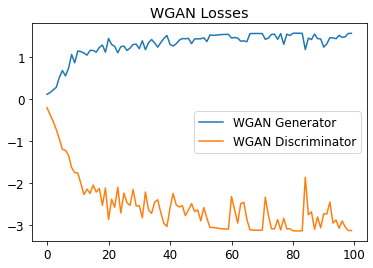

In [21]:
# read discriminator and generator losses
with open('project/wgan_avg_dsc_losses.pkl', 'rb') as f:
    vanilla_dsc_avg_losses = pickle.load(f)
    
with open('project/wgan_avg_gen_losses.pkl', 'rb') as f:
    vanilla_gen_avg_losses = pickle.load(f)


plt.plot(vanilla_gen_avg_losses, label='WGAN Generator')
plt.plot(vanilla_dsc_avg_losses, label='WGAN Discriminator')
plt.legend()
plt.title('WGAN Losses')
plt.show()

Here, the losses curves are not represent cross-entropy losses and therefore are not comparable to the values in curves we shown before.
What is really important here is the next two points: 

* First, we train the discriminator twice as much as the generator. That can explain why the discriminator lossis going down faster. The fact that the generator loss is going up doesn't necessarily a bad behavior - in this case, the discriminaotr improves faster and has better probably has better capabilities than before. Thus, it difficult to the generator to make it doing mistakes and that reflected in the losses curves. Although the loss increases, it can be seen during training that it really does improve.

* Second, we can see that the loss coverages to some limit, it can be understood that the network goes to a local minimum. Convergence of both networks can indicate problems sometimes, but also may indicates that the framework converge to local minimum that later will be shown as good results. 

*** Images Generated from best model:


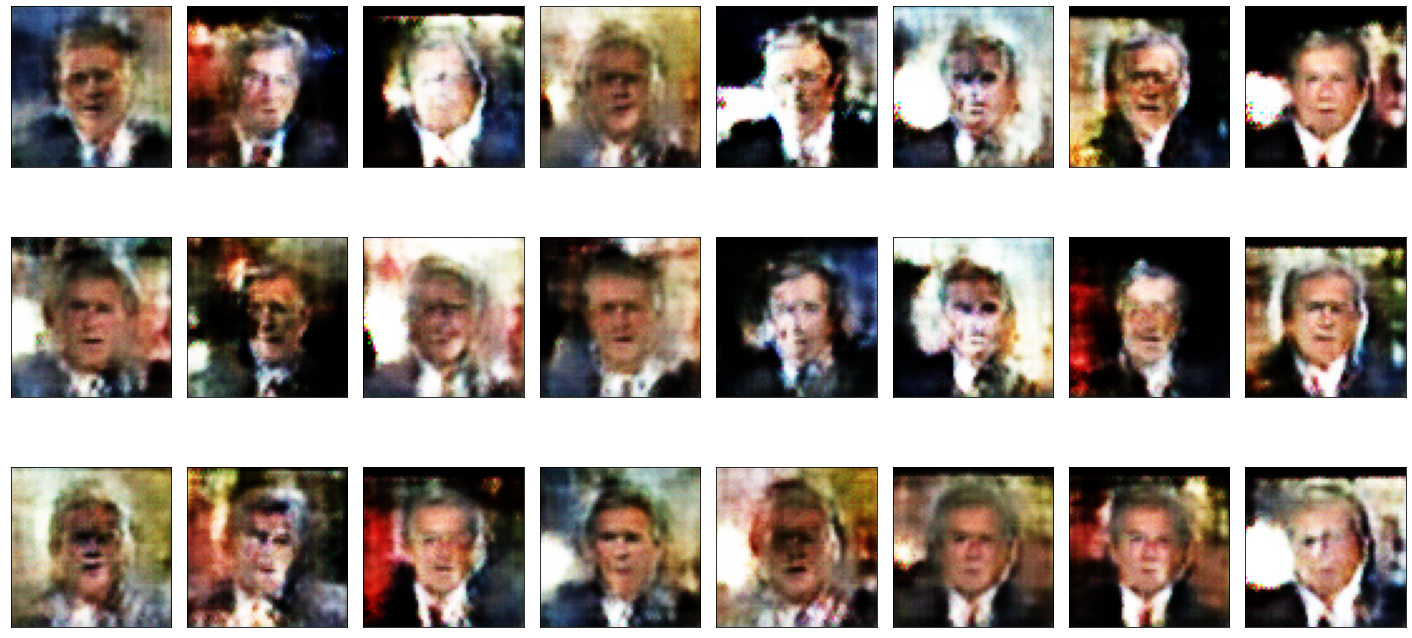

In [22]:
# Plot images from best or last model
# sn_checkpoint_file_final = f'project/wgan_final.pt'
if os.path.isfile(f'{checkpoint_file}.pt'):
    wgan_gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = wgan_gen.sample(n=24, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(25,12))

As can be seen, we've also here got better generated image from the generator compared to the vanilla GAN. Visually, it look like the quality is a bit better than the SN-GAN during to the fact the variety of the image is bigger and the face feature are look the same.
Note, that here we change more than one network feature, as we wrote in the introduction for this section, so the comparison is not simple here (different hyper-parameters, optimizer, non-equal training between the discriminator and the generator, weight clipping, and different loss functions).

## Inception Score Comparison
---

Inception Score ([Tim Salimans, et al., 2016](https://arxiv.org/abs/1606.03498)), is an measure for evaluating generated synthetic images, specifically from GAN models.

 It calculated using the following formula:



$$ IS = exp\left( \mathbb{E}_{x\sim p_g} D_{KL}(p(y|x)  \rVert p(y) ) \right)  $$

where $x\sim p_g$ indicates that x is an image sampled from $p_g$, $D_{KL}(p \rVert q )$ is the KL-divergence between the distributions $p$ and $q$, $p(y|x)$ is the conditional class distribution, and $p(y)$ is the marginal class distribution.

The inception score tries give a score for generated images, by estimating the two quantities:
* The images generated should contain clear objects, i.e. the images are sharp rather than blurry. Mathmatically, $p(y|x)$ should be low entropy. In other words, the Inception Network should be highly confident there is a single object in the image.
* The generative algorithm should output a high diversity. Mathmatically, or $p(y)$ should be high entropy.

This metric also was shown to correlate well with human scoring of the realism of generated images from the CIFAR-10 dataset.
 
 
We will use the code provide [here](https://github.com/sbarratt/inception-score-pytorch) (`project/inception_score.py`) to calculate the inception score of our models.

Final Vanilla GAN Inception Score:
    mean = 2.11, std = 0.14 

Final SN-GAN Inception Score:
    mean = 2.51, std = 0.29 

Final WGAN Inception Score:
    mean = 2.44, std = 0.17 



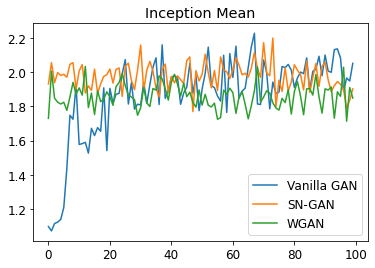

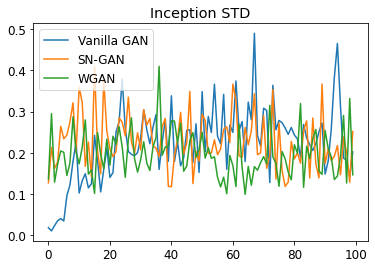

In [29]:
from project.inception_score import inception_score
# (mean, std)
num_of_samples = 320

print ("Final Vanilla GAN Inception Score:")
vanilla_inception_mean, vanilla_inception_std = inception_score(vanilla_gen.sample(n=num_of_samples, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)
print (f'    mean = {round(vanilla_inception_mean,2)}, std = {round(vanilla_inception_std,2)} \n')

print ("Final SN-GAN Inception Score:")
sn_inception_mean, sn_inception_std = inception_score(sn_gen.sample(n=num_of_samples, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)
print (f'    mean = {round(sn_inception_mean, 2)}, std = {round(sn_inception_std,2)} \n')

print ("Final WGAN Inception Score:")
wgan_inception_mean, wgan_inception_std = inception_score(wgan_gen.sample(n=num_of_samples, with_grad=False).to(device), cuda=True, batch_size=16, resize=True, splits=10)
print (f'    mean = {round(wgan_inception_mean, 2)}, std = {round(wgan_inception_std,2)} \n')


with open('project/vanilla_mean_inception.pkl', 'rb') as f:
    vanilla_mean_inception = pickle.load(f)
    
with open('project/vanilla_std_inception.pkl', 'rb') as f:
    vanilla_std_inception = pickle.load(f)

with open('project/sn_inception_mean.pkl', 'rb') as f:
    sn_mean_inception = pickle.load(f)
    
with open('project/sn_inception_std.pkl', 'rb') as f:
    sn_std_inception = pickle.load(f)
    
with open('project/wgan_inception_mean.pkl', 'rb') as f:
    wgan_mean_inception = pickle.load(f)
    
with open('project/wgan_inception_std.pkl', 'rb') as f:
    wgan_std_inception = pickle.load(f)
    
plt.plot(vanilla_mean_inception, label='Vanilla GAN')
plt.plot(sn_mean_inception, label='SN-GAN')
plt.plot(wgan_mean_inception, label='WGAN')
plt.legend()
plt.title('Inception Mean')
plt.show()

plt.plot(vanilla_std_inception, label='Vanilla GAN')
plt.plot(sn_std_inception, label='SN-GAN')
plt.plot(wgan_std_inception, label='WGAN')
plt.legend()
plt.title('Inception STD')
plt.show()



As we can see (and our sight is good critetion, inception score has high correlated to human score as mentioned before), our new models, SN-GAN and WGAN, are better, sharper and with higher diversity. The inception score support our conclusions as the score improve by $ \sim {15\%}$. Additionally, 

Additionaly, as we said before, we can see that the WGAN has larget diversity (std) and the quality of both method look pretty similar (mean).

### The Problems of the Incpection Score

As we see before, the inception score is easy and informative measure of generated data, especially for image. But it has some disadvantages of using it as this [paper ("A Note on the Inception Score", Barratt and Sharma, 2018)](https://arxiv.org/abs/1801.01973).

The issues that pointed from are:
1. **Suboptimalities of the Inception Score Itself**

    1.1. Sensitivity to weight: The paper shows that the inception score is sensitive to small changes in network weights that do not affect the final results. A better metric will not be affected by the weight but to the results only. This can be relevant to us, because we clipping the weights in WGAN and not in the other network and that can affect the score.
    
    1.2. Score calculation and exponentiation: one parameter of the inception score is the $n_{splits}$, which in practice decrease the number of sample $N$ to $\frac{N}{n_{splits}}$. Typicallu a value of $n_{splits}=10$ is chosen and that make it harder to get enough sample for good statistics w.r.t. the number of classes. In out example it didn't affect much because we aim to let the generator to work on one class.
    
2. **Problems with popular usage of inception score**

    2.1. Usage beyond ImageNet dataset: the inception score works good on the ImageNet dataset, and can work well on the CIFAR-10 but not neccesarily. Different dataset, can have different distribution over the classes ($p(y|x)$), different number of classes etc. Therefore, we don't have any guarantees regarding the generalizability of this measure.
    
    2.2. Optimizing the inceoption score (indirectly & implicitly): This measure shold be a rough guide to detect good image. Trying to improve this score indirectly can produces adverserial examples that will have high score even thogh they are not good at all.

    2.3. Not reporting overfitting: Some algorithm can memorized training einstances, that means they suffered from overfitting, but that would perform extremely well in terms of inception score.

    
It seems like, in out example the score is relatively a good measure, but between the WGAN and the SN-GAN it won't be a good criterion to select which one is better. Althogh, we see that out modification helps the model to get better performance.